In [2]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn 

In [8]:
%matplotlib inline

In [9]:
df = pd.read_csv(r"C:\Users\kaarunya\Desktop\rasp ML\mall.csv")

In [10]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
# RENAME COLUMNS
#### Rename Columns
df.rename(columns={'Gender':'gender', 'Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'}, inplace=True)
#inplace parameter determines whether the operation modifies the original DataFrame directly or returns a new DataFrame with the renamed columns.

In [13]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
df.shape

(200, 5)

In [15]:
df.isnull().sum()  #df.shape attribute in pandas returns a tuple representing the dimensions (rows and columns) of a DataFrame (df).

CustomerID    0
gender        0
age           0
income        0
score         0
dtype: int64

In [16]:
df=df.drop('CustomerID',axis=1) # removes the column 'CustomerID' from the DataFrame df

In [17]:
df

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


C:\Users\kaarunya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kaarunya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kaarunya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


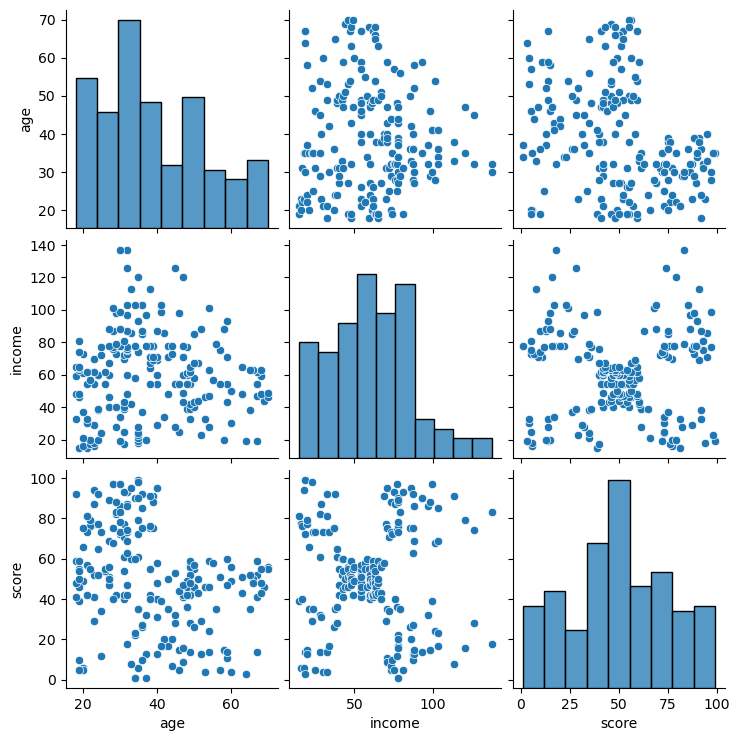

In [18]:
seaborn.pairplot(df[['age','income','score']])

In [20]:
x= df.drop(['score','gender'],axis=1)
x

,age,income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [22]:
y=df['score']
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: score, Length: 200, dtype: int64

In [28]:
import sklearn.cluster as cluster

In [33]:
kmeans=cluster.KMeans(n_clusters=5) #k=5

In [34]:
Kmeans =kmeans.fit(df[['income','score']])
Kmeans.cluster_centers_

C:\Users\kaarunya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaarunya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [35]:
df['clusters']=kmeans.labels_

In [36]:
df['clusters']

0      4
1      1
2      4
3      1
4      4
      ..
195    0
196    3
197    0
198    3
199    0
Name: clusters, Length: 200, dtype: int32

In [37]:
df.head(15)

,gender,age,income,score,clusters
0,Male,19,15,39,4
1,Male,21,15,81,1
2,Female,20,16,6,4
3,Female,23,16,77,1
4,Female,31,17,40,4
5,Female,22,17,76,1
6,Female,35,18,6,4
7,Female,23,18,94,1
8,Male,64,19,3,4
9,Female,30,19,72,1


In [38]:
df['clusters'].value_counts()

clusters
2    81
0    39
3    35
4    23
1    22
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='score'>

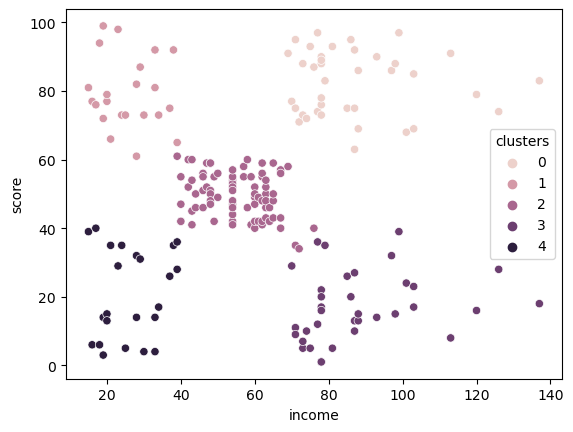

In [39]:
seaborn.scatterplot(x='income',y='score',hue='clusters',data=df)

In [40]:
from sklearn.cluster import KMeans

In [41]:
K_range=range(1,15)
wcss=[]

In [42]:
for k in K_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)

C:\Users\kaarunya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaarunya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kaarunya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaarunya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

In [43]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 25024.844459482734,
 21806.81299869546,
 19646.482018947238,
 17849.609174804526,
 15802.200864251652,
 14503.34932243761,
 13357.61962091962]

Text(0.5, 1.0, 'Tennis Elbow Courve')

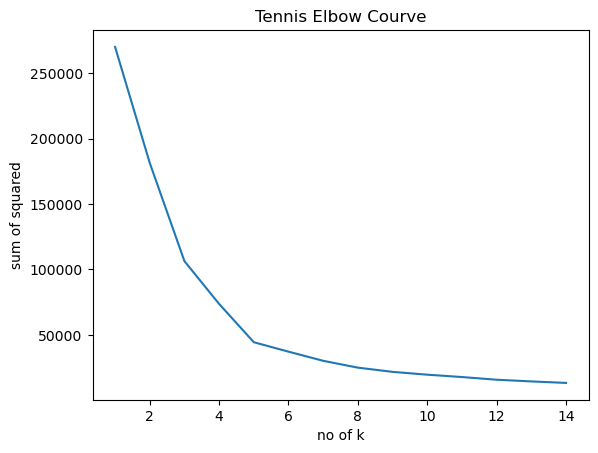

In [44]:
plt.xlabel('no of k') 
plt.ylabel('sum of squared') 
plt.plot(K_range,wcss) 
plt.title('Tennis Elbow Courve') 

In [63]:
kmeans=cluster.KMeans(n_clusters=4)

In [65]:
kmeans2 = kmeans.fit(df[['age','score']])

C:\Users\kaarunya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaarunya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [67]:
kmeans.cluster_centers_

array([[27.61702128, 49.14893617],
       [43.29166667, 15.02083333],
       [55.70833333, 48.22916667],
       [30.1754386 , 82.35087719]])

In [69]:
df['clusters']=kmeans.labels_

In [71]:
df['clusters']

0      0
1      3
2      1
3      3
4      0
      ..
195    3
196    1
197    3
198    1
199    3
Name: clusters, Length: 200, dtype: int32

In [73]:
df.head(15)

,gender,age,income,score,clusters
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,0
5,Female,22,17,76,3
6,Female,35,18,6,1
7,Female,23,18,94,3
8,Male,64,19,3,1
9,Female,30,19,72,3


In [75]:
kmeans = cluster.KMeans(n_clusters = 4)

In [77]:
kmeans= kmeans.fit(df[['age','score']])

C:\Users\kaarunya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaarunya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [79]:
kmeans.cluster_centers_

array([[30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [55.70833333, 48.22916667],
       [27.61702128, 49.14893617]])

In [81]:
df['age_clusters'] = kmeans.labels_

In [83]:
df['age_clusters'].value_counts()

age_clusters
0    57
1    48
2    48
3    47
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='score'>

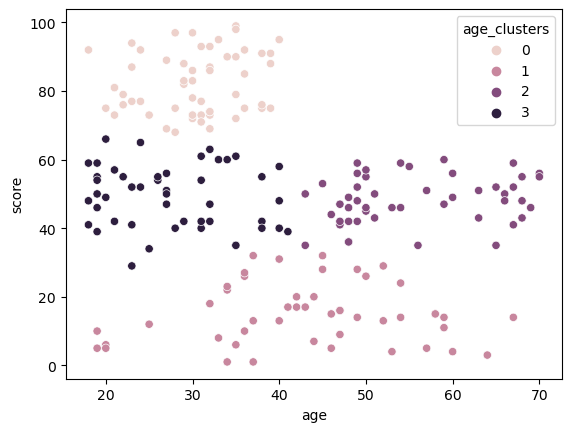

In [85]:
seaborn.scatterplot(x='age', y='score',hue='age_clusters',data=df)